In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [54]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [55]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
df.shape

(500, 9)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [58]:
df.duplicated().sum()

0

In [59]:
df.drop(columns=['Serial No.'], inplace=True)

In [60]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [61]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [65]:
model = Sequential()

model.add(Dense(7, activation='relu', input_dim=7))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='linear'))

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 7)                 56        
                                                                 
 dense_6 (Dense)             (None, 7)                 56        
                                                                 
 dense_7 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss='mean_squared_error', optimizer='Adam')

In [68]:
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 0.0961 - val_loss: 0.0761
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0560 - val_loss: 0.0492
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0395 - val_loss: 0.0438
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0365 - val_loss: 0.0416
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0330 - val_loss: 0.0365
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0291 - val_loss: 0.0321
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0257 - val_loss: 0.0281
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0225 - val_loss: 0.0240
Epoch 9/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.0204
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0163 - val_loss: 0.0168
Epoch 11

In [69]:
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 2ms/step


In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7508695976347715

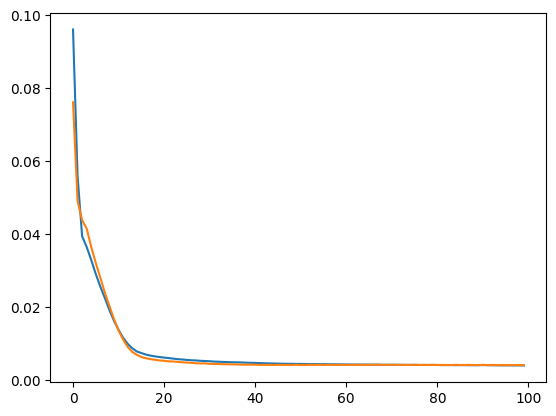

In [71]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])